# Unit 4 Classwork 

The goals of this assignment are to help you (1) use numerical simulation to analyze and interpret the Central Limit Theorem, (2) calculate probabilities using `R`, and (3) estimate probabilities and other quantities through numerical (computer) simulation. Such simulations can be useful. We can use simulations to help confirm that we've calculated a probability "by hand" correctly, or to estimate other quantities, like areas/integrals!


## Problem 1

**1.(a) In a matrix `x`, generate $500$ samples, each of size $n = 50$, from your favorite (non-normal) distribution.**

*Note! In any practical scenario, we would only have one sample of size $n$. The purpose here is the study the distribution of the sample mean, $\bar{x}$, over many (here, $500$) samples. This is an extremely important concept for statistical inference. The distribution of the sample mean, as well as the distribution of other estimators, over many samples will be used used heavily in the statistical inference portion of the class.*

In [28]:
m = 500
n = 50

# for a binomial random variable
p = 0.5

x = t(replicate(m, expr = rbinom(50, n, p)))
head(x)
dim(x)

25,27,25,23,23,23,20,20,22,25,...,27,25,27,26,28,29,26,25,23,21
26,29,29,26,24,28,19,27,24,25,...,26,24,24,27,19,24,26,20,29,23
22,30,25,17,24,25,21,22,33,22,...,20,21,28,25,25,32,26,26,27,27
28,24,19,25,21,24,21,22,27,29,...,26,30,23,28,25,23,32,25,26,23
20,29,29,27,22,21,27,28,29,24,...,27,25,22,24,22,23,24,32,28,23
29,31,22,25,23,27,26,31,21,27,...,26,26,26,21,24,25,20,29,21,21


[1] 500  50

**1.(b) Calculate the mean of each sample. This should be a vector of size $500$. Call this vector `xbar`.**

*Note: `xbar` represents the means of $500$ different samples (again: in the real world, we'd only have one of these samples; but this allows us to think about the distribution of the estimator `xbar`).*


In [29]:
xbar = rowMeans(x)
head(xbar)

[1] 25.28 24.48 25.40 25.14 24.98 25.06

**1.(c) Construct a histogram of the means. Characterize the distribution of `xbar`. What is the sample mean of `xbar`? The variance of `xbar`?**

[1] 25.04132

[1] 0.2715021

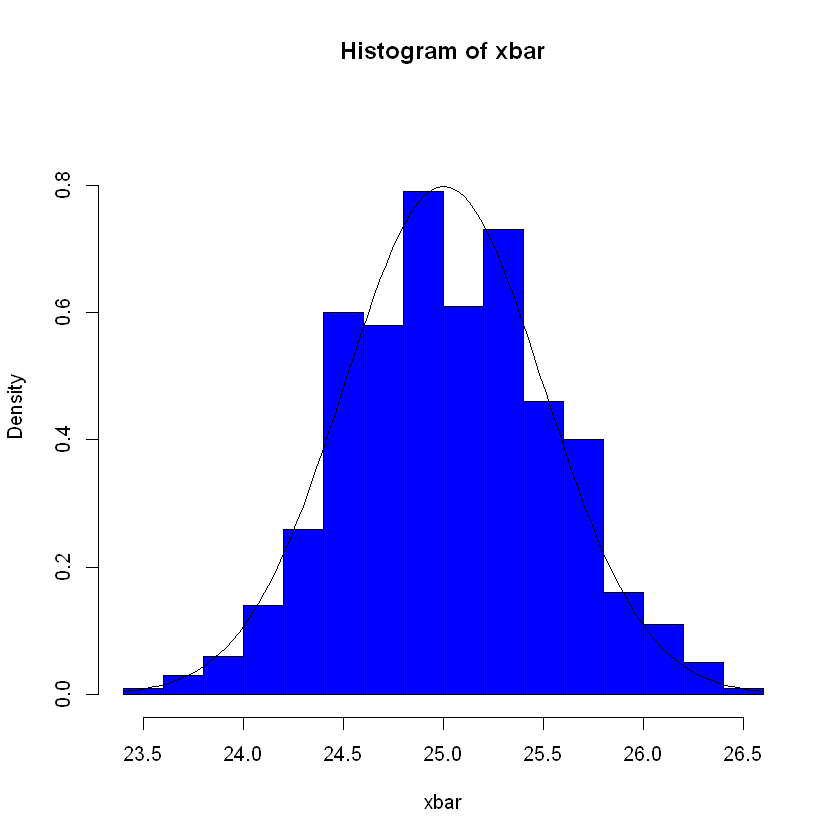

In [30]:
mean(xbar)
var(xbar)

hist(xbar, freq=FALSE, breaks = 15, ylim = c(0,0.9), c = 'blue')
curve(dnorm(x,mean = n*p, sd= sqrt(p*(1-p))),add=TRUE)

**1.(d) What theoretical result from class is this a demonstration of?**

Central Limit Theorem

## Problem 2

The amount of impurity in a batch of a chemical product is a random variable with mean value $4.0 \, \text{g}$ and standard deviation $1.5 \, \text{g}$. The distribution of this random variable is unknown.

**If 50 batches are independently prepared, what is the (approximate) probability that the average amount of impurity in these $50$ batches is between $3.5 \, \text{g}$ and $3.8 \, \text{g}$?**

In [39]:
n = 50
mu = 4
sigma = 1.5
xbar_sigma = 1.5/sqrt(n)
pnorm(3.8,mu,xbar_sigma) - pnorm(3.5,mu,xbar_sigma)

[1] 0.1636782

## Problem 3

Suppose that we are going to collect data containing information for $480$ purchases at Monk's Cafe. Further, suppose we know two out of every three purchases at Monk's Cafe are paid for by credit cards.

**3.(a) What is the probability that greater than $300$ (of the $480$) purchases will be made by credit card? Use a binomially distributed random variable here.**

In [32]:
# Compute the Exact Probability
n = 480
p = 2/3
# prob(creditcards)>300
1 - pbinom(300,n,p)

[1] 0.9696372

**3.(b) Now, consider $X \sim N\left(\mu=np, \sigma= \sqrt{np(1 - p)}\right)$, for appropriate values of $n$ and $p$. Find the probability that $X$ is greater than $300$. Compare this to the answer in part 3.(a).**

In [33]:
n = 480
p = 2/3
#After Applying the Central Limit Theorem
1 - pnorm((300 - n*p)/sqrt(n*p*(1-p)))

[1] 0.9735962

Here both the methods give the probability of around 97%. The normal approx. is close to binomial's value. Binomial distributions with the Larger n value(m=480) and the probability is not too close to 0 or 1 and it can be approximated by normal distribution. But here, Binomial distribution predicts it's accurate precise value.

**3.(c) Plot the PMF of the binomial random variable used in 3.(a) and the PDF of $X$ from part 3.(b). Comment on the plots.**


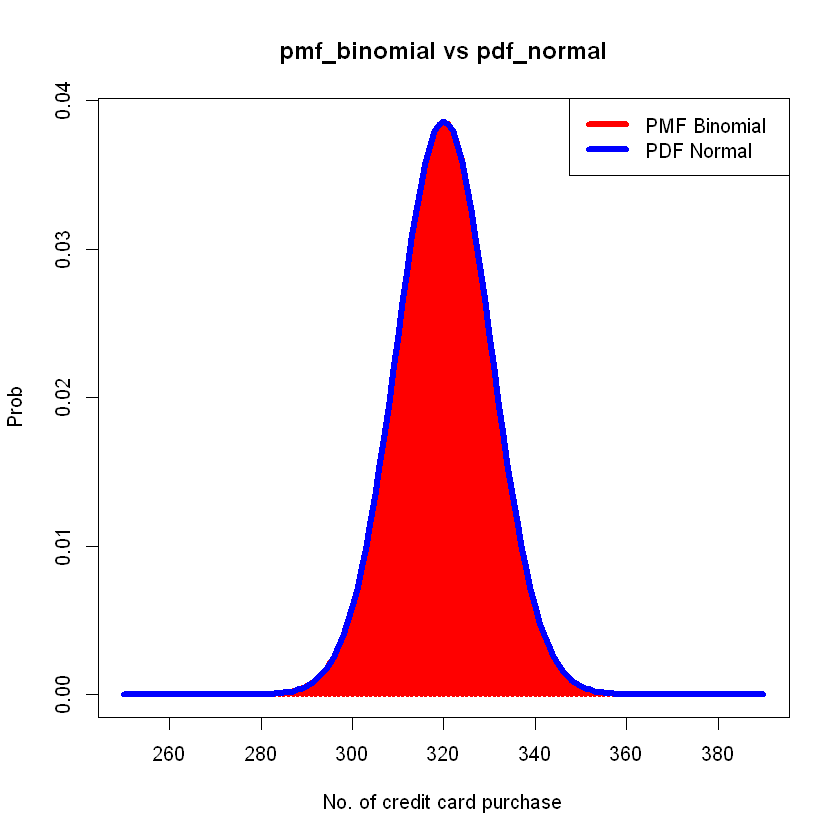

In [34]:
x <- 250:390
pmf_binomial = dbinom(x, n, p)
pdf_normal = dnorm(x, n*p, sqrt(n*p*(1-p)))
plot(x, pmf_binomial, type = "h", lwd = 5, col = "red",
     main = "pmf_binomial vs pdf_normal",
     xlab = "No. of credit card purchase",
     ylab = "Prob",
     ylim = c(0, max(pmf_binomial,pdf_normal)))

lines(x, pdf_normal, col = 'blue', lwd = 5)
legend("topright", legend = c("PMF Binomial", "PDF Normal"),
       col = c("red", "blue"), lwd = 5)

- Both the distribution shows a bell shaped curve.
- The curves are symmetric and they are centered around the mean.
- Binomial dist. here is 'discrete' and Normal Dist. here is 'continuous'.
- Here the normal approximation works because of the large 'n' value and p value(n=480) which is not of the extreme case like either '0' or '1'(p=2/3).


**3.(d) Find the probability that between $300$ and $320$ people will pay for their purchases using a credit card. Use both the binomial distribution and the normal approximation given above.**

In [35]:
prob_binomial <- pbinom(320, n, p) - pbinom(300, n, p)
prob_normal <- pnorm(320.5, n*p, sqrt(n*p*(1-p))) - pnorm(299.5, n*p, sqrt(n*p*(1-p))) #Continuity Correction for Normal Distribution

In [36]:
prob_binomial

[1] 0.4867985

In [27]:
prob_normal

[1] 0.4957286